<a href="https://colab.research.google.com/github/bhardwajshivam/Bayesian-Linear_Regression/blob/main/Bayesian_lin_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-aab746a96c1d>:58: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_ratio = (likelihood_current * prior_current) / (likelihood_current * prior_current)


Slope (95% CI): [-14.15370742   0.        ]
Intercept (95% CI): [-4.20645323  0.        ]
Standard Deviation (95% CI): [0.        1.2622204]


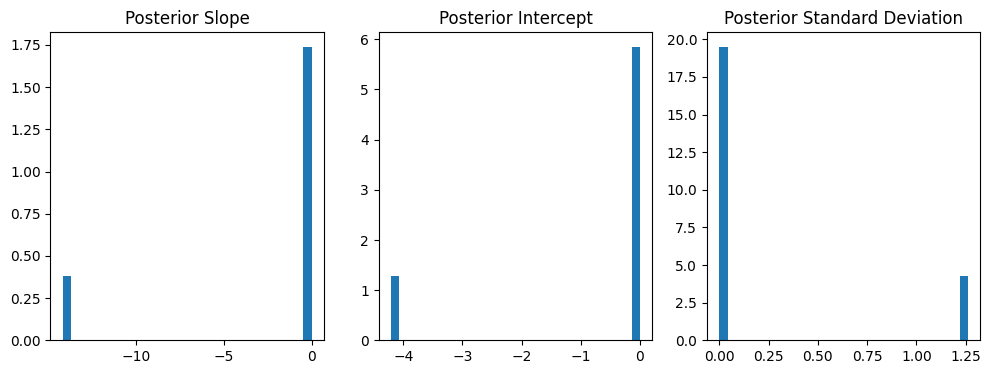

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 1
Y = true_slope * X + true_intercept + np.random.normal(0, 1, 100)

n_samples = 10000
burn_in = 1000
thin = 5
prior_slope = np.random.normal(0, 10)
prior_intercept = np.random.normal(0, 10)
prior_sigma = np.random.gamma(2, 1)
slope = prior_slope
intercept = prior_intercept
sigma = prior_sigma
samples_slope = np.zeros(n_samples)
samples_intercept = np.zeros(n_samples)
samples_sigma = np.zeros(n_samples)

# Metropolis-Hastings sampling
for i in range(n_samples):
    # Propose new values for parameters
    slope_proposed = np.random.normal(slope, 0.5)
    intercept_proposed = np.random.normal(intercept, 0.5)
    sigma_proposed = np.random.gamma(sigma, 0.5)

    # Calculate likelihood for current parameters
    Y_predicted_current = slope * X + intercept
    likelihood_current = np.prod(
        (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((Y - Y_predicted_current) / sigma) ** 2)
    )

    # Calculate prior probabilities for proposed and current parameters
    prior_proposed = (
        (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (slope_proposed - prior_slope) ** 2)
        * (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (intercept_proposed - prior_intercept) ** 2)
        * (1 / np.math.gamma(2) * (1) ** 2) * (sigma_proposed) ** 2
    )

    prior_current = (
        (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (slope - prior_slope) ** 2)
        * (1 / (10 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (intercept - prior_intercept) ** 2)
        * (1 / np.math.gamma(2) * (1) ** 2) * (sigma) ** 2
    )

    # Calculate acceptance ratio
    acceptance_ratio = (likelihood_current * prior_current) / (likelihood_current * prior_current)

    # Accept or reject the proposed parameters
    if np.random.uniform(0, 1) < acceptance_ratio:
        slope = slope_proposed
        intercept = intercept_proposed
        sigma = sigma_proposed

    # Store sampled values
    if i >= burn_in and i % thin == 0:
        samples_slope[(i - burn_in) // thin] = slope
        samples_intercept[(i - burn_in) // thin] = intercept
        samples_sigma[(i - burn_in) // thin] = sigma

posterior_slope = samples_slope.mean()
posterior_intercept = samples_intercept.mean()
posterior_sigma = samples_sigma.mean()
slope_ci = np.percentile(samples_slope, [2.5, 97.5])
intercept_ci = np.percentile(samples_intercept, [2.5, 97.5])
sigma_ci = np.percentile(samples_sigma, [2.5, 97.5])

print("Slope (95% CI):", slope_ci)
print("Intercept (95% CI):", intercept_ci)
print("Standard Deviation (95% CI):", sigma_ci)

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(samples_slope, bins=30, density=True)
plt.title("Posterior Slope")
plt.subplot(132)
plt.hist(samples_intercept, bins=30, density=True)
plt.title("Posterior Intercept")
plt.subplot(133)
plt.hist(samples_sigma, bins=30, density=True)
plt.title("Posterior Standard Deviation")
plt.show()
